# <span style="text-decoration: underline">AOS 51 Lab: Data Analysis for Climate Science, Session #3</span>
# <span>🌎🔥 👩🏿‍💻👩🏾‍💻 👨🏽‍💻👩🏼‍💻 👨🏼‍💻👨🏾‍💻👩🏽‍💻 👨🏿‍💻</span>

#### So far, we've been exposed to matplotlib, but mostly used Pandas to generate plots. Today we'll take a deep diver into Matplotlib and then enter the world of multi-dimensional data using Xarray!

---

In [1]:
# modules needed for today's lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Diving Deeper Into Matplotlib 🎨

We've done a lot of plotting using Pandas, which is completely fine, but it's not as powerful as matplotlib.

Let's learn how plots actually work in matplotlib, then start customizing them to our liking. 

---
## Terminology 

Let's view [this Jupyer Notebook](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) to visualuze how Matplotlib defines three terms:

1. Figure
2. Axes/subplot
3. Y-axis and X-axis 

We see that:

1. The "Figure" is the highest-level container of the plot. It encapsulates the entire page where stuff is drawn. 

2. "Axes" are the area that we plot data on, along with any ticks/labels/etc associated with it. An Axes is created with a call to `subplot`, so Axes and Subplot are mostly synonymous terms now. 

3. Each Axes has an "XAxis" and a "YAxis". These contain the ticks, tick locations, labels, etc.
---

## Creating a plot

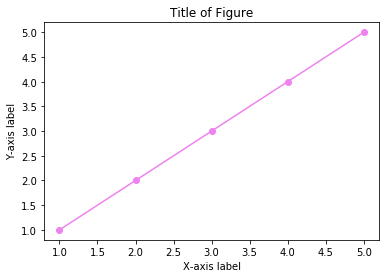

In [35]:
# Create some sample data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

fig = plt.figure() # create a Figure
ax = fig.add_subplot(1,1,1) # create an axes/subbplot in the figure (row #, col #, subplot #) = (1, 1, 1)
ax.plot(x_data, y_data, color='violet', marker='o')
ax.set_title('Title of Figure')
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
plt.show()

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise 🦀</span>

Let's use `matplotlib` to create a nice line plot of monthly-average high temperature over Baltimore, MD (list of temperatures provided below).

**Instructions:**
1. Use [np.arange()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) to create a range of month indices spanning 1 through 12. Assign this array to the variable name `months`.
2. With `temperature` on the y-axis and `months` on the x-axis, create a line plot using `matplotlib`. Make sure you give your plot a title and label the x- and y-axis.

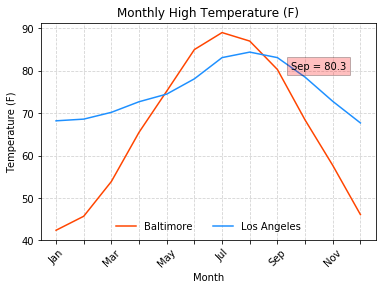

In [13]:
baltimore_temps = [42.4, 45.7, 53.9, 65.5, 75.2, 85.0, 89.0, 87.0, 80.3, 68.4, 57.7, 46.1]
la_temps = [68.2, 68.6, 70.2, 72.7, 74.5, 78.1, 83.1, 84.4, 83.1, 78.5, 72.8, 67.7]

months = np.arange(1,13)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(months, baltimore_temps, color='orangered', label='Baltimore')
ax.plot(months, la_temps, color='dodgerblue', label='Los Angeles')
ax.set_title('Monthly High Temperature (F)')
ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Month')

# Modifying xticks
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(['Jan', '', 'Mar', '', 'May', '', 'Jul', '', 'Sep', '', 'Nov', ''], rotation=45)

# Add grid lines
ax.grid(axis='both', color='lightgrey', linestyle='dashed')

# Adding text overlays
ax.text(9.5, 80.3, 'Sep = 80.3', bbox=dict(facecolor='red', alpha=0.25))

# Adding a legend
plt.legend(loc='lower center', frameon=False, ncol=2)

plt.show()

## Customizing the ticks and tick-labels
So far, we've let matplotlib figure out the best tick spacing and labels for our plots, but they are highly customizable.

** Setting x-ticks and y-ticks**

We can manually set the [x-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) and [y-ticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html) using:

`ax.set_xticks([list or 1D array of tick locations])`

`ax.set_yticks([list or 1D array of tick locations])`

** Setting x-ticklabels and y-ticklabels **

We can set the [x-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) and [y-ticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html) using:

`ax.set_xticklabels([list of tick labels as strings])`

`ax.set_yticklabels([list of tick labels as strings])`

** Example **

If we have 12 data points representing some values for a given calendar month, we can set 12 x-ticks with labels as:

`ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])` 

OR 

`ax.set_xticks(np.arange(1,13))`

`ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures to have 12 `xticks` with corresponding monthly `xticklabels`. The labels can be full month names or abbreviated (e.g. 'Jan', or 'J'). 

## Grid lines

We can add [grid lines](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html) with:

`ax.grid(axis={'x', 'y', or 'both'}` with optional arguments of `color`, `linewidth`, and `linestyle` and many more. 

For instance, drawing grid lines for both axes in a lightgrey dashed style would look like:

`ax.grid(axis='both', color='lightgrey', linestyle='dashed')`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures to have grid lines only for the x-axis, choose an appropriate color (e.g. something not distracting from the data curve!) and give them a 'dotted' `linestyle`.

## Text overlays

We can add text overlays to the plot with:

`ax.text({x-location}, {y-location}, {string of text})` and optional arguments like `fontsize` and `bbox`, which creates a boundary box to include background colors to the text overlay. 

Examples:

* Adding the temperature for February (x-tick of 2, so let's use 2.5 to get it some padding) on the plot:

`ax.text(2.5, 45.7, 'Feb = 45.7')`
* With a fancy border box: 

`ax.text(2.5, 45.7, 'Feb = 45.7', bbox=dict(facecolor='red', alpha=0.25))`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Revise your plot of Baltimore monthly-temperatures by adding a text label displaying September's temperture.

## Multi-line plots with labels and a legend

We can add as many lines to a single plot as we wish with additional `ax.plot(x, y)` commands. 

However, we can also attach unique labels to each line with the `label` argument:

`ax.plot(x, y, label='Data 1')`

Then, we can create a [legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) based on those line labels using:

`plt.legend()` that can take in additional arguments like `loc='upper left'`, `frameon=False`, and more. 

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Below is a list of average monthly temperatures for Los Angeles. Add this data to the Baltimore plot, attaching labels to each line and creating a legend displaying those labels. 

In [5]:
la_temps = [68.2, 68.6, 70.2, 72.7, 74.5, 78.1, 83.1, 84.4, 83.1, 78.5, 72.8, 67.7]

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Let's return to last week's dataset `extreme_heat_days_rcp85_tasmax.csv` and use `matplotlib` to plot each GCM's projection of the number of extremely hot days per year over LA through 2099. 

**Instructions**
1. Read in `extreme_heat_days_rcp85_tasmax.csv` to create a new DataFrame. 
2. Slice out the GCM projections spanning 2006-2099.
3. Plot each GCM projection as a line, including appropriate labels (axes and a legend), titles, colors, grid lines, etc. to your plot. 

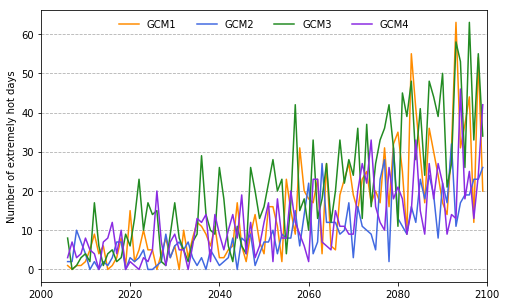

In [19]:
# Read CSV file and create dataframe
df = pd.read_csv('/Users/nberg/AOS51/data/extreme_heat_days_rcp85_tasmax.csv', index_col=0, parse_dates=True)
df.index.name = None

# Slice out GCM data for 2006 - 2099
gcm1 = df.loc['2006':'2099', 'GCM1']
gcm2 = df.loc['2006':'2099', 'GCM2']
gcm3 = df.loc['2006':'2099', 'GCM3']
gcm4 = df.loc['2006':'2099', 'GCM4']

# Create x-data
years = np.arange(2006,2100)

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(years, gcm1, color='darkorange', label='GCM1')
ax.plot(years, gcm2, color='royalblue', label='GCM2')
ax.plot(years, gcm3, color='forestgreen', label='GCM3')
ax.plot(years, gcm4, color='blueviolet', label='GCM4')
ax.set_ylabel('Number of extremely hot days')
ax.set_xlim(2000, 2100)
ax.grid(axis='y', linestyle='dashed')
plt.legend(loc='upper center', frameon=False, ncol=4)

## Multi-panel plots

Multi-panel plots have two differences from the single-panel plots we have worked with so far:

1. Each sub-panel needs to have a unique `axes` (e.g. `ax1`, `ax2`, etc.)
2. The sub-panel position needs to be defined when added to the figure in the (row #, col #, plot #) call.

Let's demonstate with a 1 row x 2 column multi-panel plot:

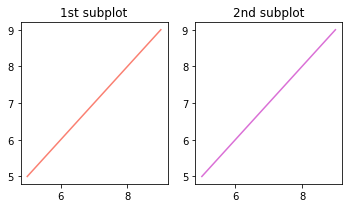

In [7]:
fig = plt.figure(figsize=(5,3)) # specify the figure (width, height) in unit inches

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 columns, 1st subplot
ax1.plot(np.arange(5,10), np.arange(5,10), color='salmon')
ax1.set_title('1st subplot')

ax2 = fig.add_subplot(1,2,2) # 1 row, 2 columns, 2nd subplot
ax2.plot(np.arange(5,10), np.arange(5,10), color='orchid')
ax2.set_title('2nd subplot')

fig.tight_layout() # automatically adjusts subplots to fit in the figure
plt.show()

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Below are lists storing monthly-average precipitation (unit: inches) for Chicago, San Francisco, and Atlanta. 

** Instructions **
1. Convert each dataset from units of inches to millimeters.
2. Create a 1 row x 3 column plot where each subplot displays a **bar** chart of a given city's monthly-average precipitation.
3. Make sure the y-axis spans the same range for each subplot (i.e. the same `ylim`) to help compare precip across the cities.

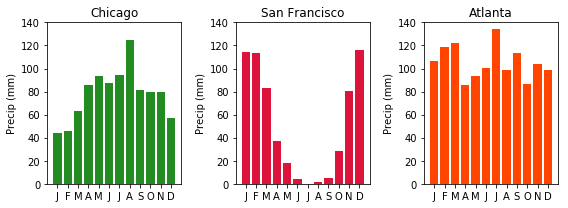

In [34]:
chi = [1.73, 1.79, 2.50, 3.38, 3.68, 3.45, 3.70, 4.90, 3.21, 3.15, 3.15, 2.25]
sf = [4.5, 4.46, 3.26, 1.46, 0.70, 0.16, 0.00, 0.06, 0.21, 1.12, 3.16, 4.56]
atl = [4.20, 4.67, 4.81, 3.36, 3.67, 3.95, 5.27, 3.90, 4.47, 3.41, 4.10, 3.90]

# Convert from inches to mm (1 in = 25.4 mm)
# Need to transform lists to arrays first!
chi_arr = np.array(chi) * 25.4
sf_arr = np.array(sf) * 25.4
atl_arr = np.array(atl) * 25.4

# 1x3 plot
months = np.arange(1,13)

fig = plt.figure(figsize=(8,3))

ax1 = fig.add_subplot(1,3,1)
ax1.bar(months, chi_arr, color='forestgreen')
ax1.set_xticks(np.arange(1,13))
ax1.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax1.set_ylabel('Precip (mm)')
ax1.set_ylim(0, 140)
ax1.set_title('Chicago')

ax2 = fig.add_subplot(1,3,2)
ax2.bar(months, sf_arr, color='crimson')
ax2.set_xticks(np.arange(1,13))
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax2.set_ylabel('Precip (mm)')
ax2.set_ylim(0, 140)
ax2.set_title('San Francisco')

ax3 = fig.add_subplot(1,3,3)
ax3.bar(months, atl_arr, color='orangered')
ax3.set_xticks(np.arange(1,13))
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax3.set_ylabel('Precip (mm)')
ax3.set_ylim(0, 140)
ax3.set_title('Atlanta')

fig.tight_layout()

plt.savefig('/Users/nberg/AOS51_v2/figures/rainfall.eps')

## Saving figures

Now that we've created all these lovely figures, let's save them! 

At the very end of the code to create a figure, simply use:

`plt.savefig({full path and filename})`

to save the figure in your desired location.

For instance, to store a figure called "Histogram.eps" in /Users/nberg/AOS51/figures/:

`plt.savefig('/Users/nberg/AOS51/figures/Histogram.eps')`

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

**Instructions**
1. Create a new sub-directory in your `AOS51` directory called `figures`.
2. Save the 3-panel figure from the last in-class exercise as an .eps file.